In [1]:
import keras
keras.__version__

'2.5.0'

In [2]:
import os, shutil

# Building a small set of data

In [9]:
# The path to the directory where the original
# dataset was uncompressed
original_mask_dataset_dir = '/Users/crystalhuang/Documents/GitHub/deep_learning_project/Face Mask Dataset/Train/WithMask'
original_nomask_dataset_dir = '/Users/crystalhuang/Documents/GitHub/deep_learning_project/Face Mask Dataset/Train/WithoutMask'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/crystalhuang/Documents/GitHub/deep_learning_project/smalldataset'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training mask pictures
train_mask_dir = os.path.join(train_dir, 'WithMask')
os.mkdir(train_mask_dir)

# Directory with our training nomask pictures
train_nomask_dir = os.path.join(train_dir, 'WithoutMask')
os.mkdir(train_nomask_dir)

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(validation_dir, 'WithMask')
os.mkdir(validation_mask_dir)

# Directory with our validation nomask pictures
validation_nomask_dir = os.path.join(validation_dir, 'WithoutMask')
os.mkdir(validation_nomask_dir)

# Directory with our validation mask pictures
test_mask_dir = os.path.join(test_dir, 'WithMask')
os.mkdir(test_mask_dir)

# Directory with our validation nomask pictures
test_nomask_dir = os.path.join(test_dir, 'WithoutMask')
os.mkdir(test_nomask_dir)

# Copy first 1000 mask images to train_mask_dir
parent_list = os.listdir(original_mask_dataset_dir)
count=0
for child in parent_list:
    if count<1000:
        src = os.path.join(original_mask_dataset_dir, child)
        dst = os.path.join(train_mask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1    
    
# Copy next 500 mask images to validation_mask_dir
parent_list = os.listdir(original_mask_dataset_dir)
count=0
for child in parent_list:
    if count<1000:
        pass
    elif count >= 1000 and count <1500:
        src = os.path.join(original_mask_dataset_dir, child)
        dst = os.path.join(validation_mask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1   

# Copy next 500 mask images to test_mask_dir
parent_list = os.listdir(original_mask_dataset_dir)
count=0
for child in parent_list:
    if count<1500:
        pass
    elif count >= 1500 and count <2000:
        src = os.path.join(original_mask_dataset_dir, child)
        dst = os.path.join(test_mask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1   

# Copy first 1000 nomask images to train_nomask_dir
parent_list = os.listdir(original_nomask_dataset_dir)
count=0
for child in parent_list:
    if count<1000:
        src = os.path.join(original_nomask_dataset_dir, child)
        dst = os.path.join(train_nomask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1   

# Copy next 500 nomask images to validation_nomask_dir
parent_list = os.listdir(original_nomask_dataset_dir)
count=0
for child in parent_list:
    if count<1000:
        pass
    elif count >= 1000 and count <1500:
        src = os.path.join(original_nomask_dataset_dir, child)
        dst = os.path.join(validation_nomask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1  

# Copy next 500 nomask images to test_nomask_dir
parent_list = os.listdir(original_nomask_dataset_dir)
count=0
for child in parent_list:
    if count<1500:
        pass
    elif count >= 1500 and count <2000:
        src = os.path.join(original_nomask_dataset_dir, child)
        dst = os.path.join(test_nomask_dir, child)
        shutil.copyfile(src, dst)
    else:
        break
    count += 1  

In [10]:
print('total training mask images: ', len(os.listdir(train_mask_dir)))
print('total training nomask images: ', len(os.listdir(train_nomask_dir)))
print('total validation mask images: ', len(os.listdir(validation_mask_dir)))
print('total validation nomask images: ', len(os.listdir(validation_nomask_dir)))
print('total test mask images: ', len(os.listdir(test_mask_dir)))
print('total test nomask images: ', len(os.listdir(test_nomask_dir)))

total training mask images:  1000
total training nomask images:  1000
total validation mask images:  500
total validation nomask images:  500
total test mask images:  500
total test nomask images:  500


# Building network model for small dataset

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

/Users/crystalhuang/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Data preprocessing

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting training data into model

In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/Users/crystalhuang/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 88s 728ms/step - loss: 0.4789 - acc: 0.7299 - val_loss: 0.1510 - val_acc: 0.9480
Epoch 2/30
100/100 [==============================] - 71s 711ms/step - loss: 0.1535 - acc: 0.9490 - val_loss: 0.1514 - val_acc: 0.9440
Epoch 3/30
100/100 [==============================] - 77s 773ms/step - loss: 0.1237 - acc: 0.9570 - val_loss: 0.0906 - val_acc: 0.9710
Epoch 4/30
100/100 [==============================] - 76s 758ms/step - loss: 0.0835 - acc: 0.9693 - val_loss: 0.0844 - val_acc: 0.9670
Epoch 5/30
100/100 [==============================] - 81s 811ms/step - loss: 0.0782 - acc: 0.9684 - val_loss: 0.0699 - val_acc: 0.9720
Epoch 6/30
100/100 [==============================] - 147s 1s/step - loss: 0.0536 - acc: 0.9792 - val_loss: 0.0650 - val_acc: 0.9750
Epoch 7/30
100/100 [==============================] - 153s 2s/step - loss: 0.0396 - acc: 0.9860 - val_loss: 0.0876 - val_acc: 0.9690
Epoch 8/30
100/100 [==============================] - 174s 

In [21]:
# save model for small dataset
model.save('small_1.h5')

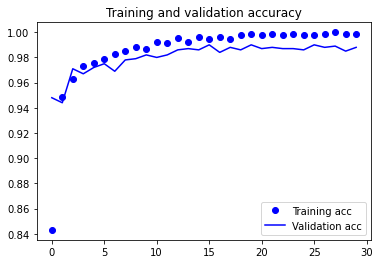

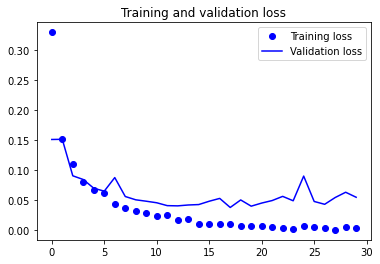

In [22]:
# checking model performance
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model performance is good! Training score is slightly higher than validation may suggestion some overfitting. But the difference isn't too big.

Will try with full dataset in the next notebook